# Perceptron: the simplest variation
<div class = "alert alert-block alert-info">Note: here a little inheritance trick is used in order to document Perceptron class.</div><br>
## About
This is just a simple implementation of PLA as seen on Caltech Machine Learning lecture 1 by Professor Yaser Abu-Mostafa<br>
https://www.youtube.com/watch?v=mbyG85GZ0PI&t=1288s

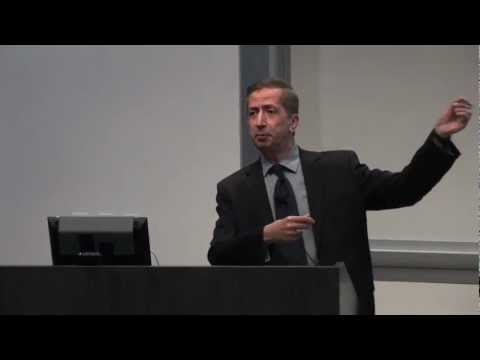

In [1]:
from IPython.display import YouTubeVideo
from datetime import timedelta
start=int(timedelta(hours=0, minutes=23, seconds=25).total_seconds())
YouTubeVideo("mbyG85GZ0PI", start=start, autoplay=1, theme="light", color="red")
YouTubeVideo("mbyG85GZ0PI")

This is a very simple model that solves a binary classification problem. We have 2 classes, -1 and 1, and a set of $k$-dimensional data points.

## Input
Input is a training set, which is labeled set of input-output pairs $\mathcal{D} = \{(x_i,y_i)\}_{i=1}^N$, where $N$ is the number of training examples and $\mathcal{D}$ is called a **training set**. This is the simplest setting, so:
- Each training input $x_i$ is a $k$-dimensional vector of features. Values of $x_i$ must be numeric (real or integer - no matter).
- Response is a $N$-dimensional vector where each $y_i\in\{1...C\}$. In our case, $y_i\in\{-1, 1\}$ which indicates that each $x_i$ is mapped to one of 2 classes.

## Algorithm
As shown in the picture above, we add a "special feature" to every $x_i$ - it is a constant $x_{i0}=1$ and add a special weight $w_0$ to weight vector (which is called bias, intercept, etc.) which allows us to write hypothesis (predicted value) as $h(\mathbf{x})=sign(\sum_{i=0}^k w_i x_i)$ for each vector $\mathbf{x}$.
![PictureHere](img/formula1.png)

In [2]:
# NumPy
import numpy as np

# Plotting
from matplotlib import pyplot as plt
%matplotlib inline

# Randomizing
from random import randint

# Comparing with scikit-learn perceptron model
import sklearn.linear_model

# Train and test sets
from sklearn.model_selection import train_test_split

Firs of all we create a method to initiate our Perceptron class. It will get maximum number of iterations and a 'verbose' parameter.

In [3]:
from abc import ABCMeta, abstractmethod

class Perceptron():
    @abstractmethod
    def __init__(self, n_iter=100, verbose=False):
        self.n_iter = n_iter
        self.X = np.empty(shape=1)
        self.y = np.empty(shape=1)
        self.coef_ = np.empty(shape=1)
        self.intercept_ = 0
        self.verbose = verbose

Now we define the function to fit our model to training set - the **fit()** function.

In [4]:
class Perceptron(Perceptron):
    
    @abstractmethod
    def fit(self, X_train, y_train):
        self.X = np.array(X_train)
        self.y = np.array(y_train)
        # 1. Pick random weights and add w0 (intercept) to weights:
        self.coef_ = np.random.randn(len(self.X[0]) + 1)
        # 2. Add constant x0=1 to all rows in X:
        self.X = np.insert(self.X, 0, 1, axis=1)
        # 3. Iterate for n_iter times or until convergence:
        iter_no = 0
        while iter_no < self.n_iter:
            # Perform w(T)X to get predictions vector:
            y_pred = np.sign(np.dot(self.X, self.coef_))
            # On predictions vector, pick a misclassified point:
            converged = True
            for y_hat_i, y_i, x_i in zip(y_pred, self.y, self.X):
                if y_hat_i != y_i:
                    # Correct weight for that point and break the loop:
                    converged = False
                    self.coef_ = self.coef_ + np.dot(x_i, y_i)
                    break
            # If no misclassified points found - STOP (convergence detected):
            if converged:
                if self.verbose:
                    print("Fitting: converged within", iter_no+1, "steps.")
                break
            # Iterate further:iter_no
            iter_no += 1
        self.intercept_ = self.coef_[0]

Let us now define a predicting method:

In [6]:
class Perceptron(Perceptron):
    
    @abstractmethod
    def predict(self, X):
        self.X = np.array(X)
        self.X = np.insert(self.X, 0, 1, axis=1)
        res = np.sign(np.dot(self.X, self.coef_))
        return res.astype(int)

And a very simple scoring method:

In [9]:
class Perceptron(Perceptron):
    
    @abstractmethod
    def score(self, X_test, y_test):
        # 1. Get a prediction:
        y_pred = self.predict(X_test)
        # 2. Compare results:
        match_counter = 0
        for y_pred_i, y_i in zip(y_pred, y_test):
            if y_pred_i == y_i:
                match_counter += 1
        return match_counter / len(y_test)

<br><br>
## Testing

Now we can check our Perceptron class on a simple data. Let's say we have some dataset which is lineary separable (one of possible ways to separate 2 classes is via $y=x-2$):

Fitting: converged within 19 steps.
This Perceptron score = 1.0
Weights are: [ 14.6744428   -6.24552633   6.1252863 ] (w0 is intercept)
SK-learn Perceptron score = 1.0
Weights are: [[-8.  8.]] ; intercept = [ 13.]


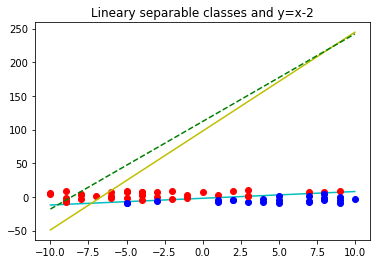

In [61]:
# 1. Creating dataset: X and y
X = []
y = []
for i in range(0, 60):
    X.append([randint(-10, 10), randint(-10, 10)])

# Case of y = x - 2
line_x = np.linspace(-10, 10, 50)
plt.plot(line_x, line_x-2, 'c-')
for index, point in enumerate(X):
    if point[1] > point[0] - 2:
        plt.plot(point[0], point[1], 'ro')
        y.append(1)
    elif point[1] < point[0] - 2:
        plt.plot(point[0], point[1], 'bo')
        y.append(-1)
    else:
        X[index][1] += 1
        plt.plot(point[0], point[1], 'ro')
        y.append(1)
plt.title("Lineary separable classes and y=x-2")


# Train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=45, test_size=15)

# Prediction: this Perceptron
p = Perceptron(verbose=True)
p.fit(X_train, y_train)
print("This Perceptron score =", p.score(X_test, y_test))
print("Weights are:", p.coef_, "(w0 is intercept)")

# Prediction: scikit-learn Perceptron
sk_p = sklearn.linear_model.Perceptron(max_iter=100)
sk_p.fit(X_train, y_train)
print("SK-learn Perceptron score =", sk_p.score(X_test, y_test))
print("Weights are:", sk_p.coef_, "; intercept =", sk_p.intercept_)

plt.plot(line_x, p.coef_[0]*(x-p.coef_[1])+p.coef_[2], 'y-')
plt.plot(line_x, sk_p.intercept_*(x-sk_p.coef_[0][0])+sk_p.coef_[0][1], 'g--')
plt.show()

/home/konstantin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Text(0.5,1,'Perceptron')

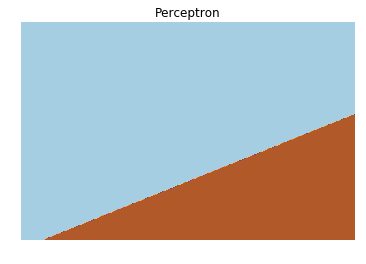

In [67]:
import numpy as np
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

X = np.array([[2,1],[3,4],[4,2],[3,1]])
Y = np.array([0,0,1,1])
h = .02  # step size in the mesh


# we create an instance of SVM and fit our data. We do not scale our
# data since we want to plot the support vectors

clf = sklearn.linear_model.Perceptron(n_iter=100).fit(X, Y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
fig, ax = plt.subplots()
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

ax.set_title('Perceptron')

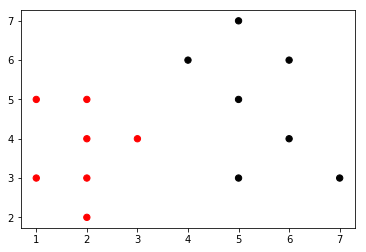

In [69]:
# Data
d = np.array([
[2, 1, 2, 5, 7, 2, 3, 6, 1, 2, 5, 4, 6, 5],
[2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 7]
])
 
# Labels
t = np.array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1])

colormap = np.array(['r', 'k'])
plt.scatter(d[0], d[1], c=colormap[t], s=40)

In [80]:
# rotate the data 180 degrees
d90 = np.rot90(d)
d90 = np.rot90(d90)
d90 = np.rot90(d90)
 
# Create the model
net = sklearn.linear_model.Perceptron(n_iter=100, verbose=0, random_state=None, fit_intercept=True, eta0=0.002)
net.fit(d90,t)

net2 = Perceptron()
net2.fit(d90, t)
 
# Print the results
print ("Prediction " + str(net2.predict(d90)))
print ("Actual     " + str(t))
print ("Accuracy   " + str(net2.score(d90, t)*100) + "%")

Prediction [1 0 1 1 1 0 1 1 0 0 1 1 1 1]
Actual     [0 0 0 1 1 0 0 1 0 0 1 1 1 1]
Accuracy   78.5714285714%


/home/konstantin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/konstantin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


[[ -5.  12.]]


IndexError: index 1 is out of bounds for axis 0 with size 1

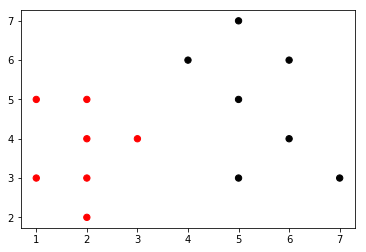

In [82]:
# Plot the original data
plt.scatter(d[0], d[1], c=colormap[t], s=40)
print(net2.coef_) 
# Output the values
print ("Coefficient 0 " + str(net2.coef_[1]))
print ("Coefficient 1 " + str(net2.coef_[2]))
print ("Bias " + str(net2.coef_[0]))
 
# Calc the hyperplane (decision boundary)
ymin, ymax = plt.ylim()
w = net2.coef_[1]
a = -w[0] / w[1]
xx = np.linspace(ymin, ymax)
yy = a * xx - (net2.coef_[0]) / w[1]
 
# Plot the line
plt.plot(yy,xx, 'k-')

## Appendix
Code for a short Perceptron class.

Fitting: converged within 53 steps.
1.0
0.933333333333


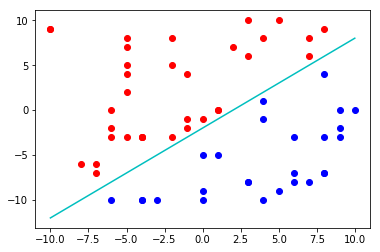

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from random import randint
import sklearn.linear_model
from sklearn.model_selection import train_test_split


class Perceptron:

    def __init__(self, n_iter=100, verbose=False):
        self.n_iter = n_iter
        self.X = np.empty(shape=1)
        self.y = np.empty(shape=1)
        self.coef_ = np.empty(shape=1)
        self.intercept_ = 0
        self.verbose = verbose

    def fit(self, X_train, y_train):
        self.X = np.array(X_train)
        self.y = np.array(y_train)
        # 1. Pick random weights while adding w0 for intercept:
        self.coef_ = np.random.randn(len(self.X[0]) + 1)
        # 2. Add x0 as 1 to all rows in X:
        self.X = np.insert(self.X, 0, 1, axis=1)

        # 3. Iterate for n_iter times:
        iter_no = 0
        while iter_no < self.n_iter:
            # Perform w(T)X to get predictions vector:
            y_pred = np.sign(np.dot(self.X, self.coef_))
            # 4. On predictions vector, pick a misclassified point:
            converged = True
            for y_hat_i, y_i, x_i in zip(y_pred, self.y, self.X):
                if y_hat_i != y_i:
                    # Correct weight for that point and break the loop:
                    converged = False
                    self.coef_ = self.coef_ + np.dot(x_i, y_i)
                    break
            # 5. If no misclassified points found - stop:
            if converged:
                if self.verbose:
                    print("Fitting: converged within", iter_no+1, "steps.")
                break
            # 6. Iterate further:iter_no
            iter_no += 1
        self.intercept_ = self.coef_[0]

    def predict(self, X):
        self.X = np.array(X)
        self.X = np.insert(self.X, 0, 1, axis=1)
        res = np.sign(np.dot(self.X, self.coef_))
        return res.astype(int)

    def score(self, X_test, y_test):
        # 1. Get a prediction:
        y_pred = self.predict(X_test)
        # 2. Compare results:
        match_counter = 0
        for y_pred_i, y_i in zip(y_pred, y_test):
            if y_pred_i == y_i:
                match_counter += 1
        return match_counter / len(y_test)


# 1. Creating dataset: X and y
X = []
y = []
for i in range(0, 60):
    X.append([randint(-10, 10), randint(-10, 10)])

# Case of y = x - 2
line_x = np.linspace(-10, 10, 50)
plt.plot(line_x, line_x-2, 'c-')
for index, point in enumerate(X):
    if point[1] > point[0] - 2:
        plt.plot(point[0], point[1], 'ro')
        y.append(1)
    elif point[1] < point[0] - 2:
        plt.plot(point[0], point[1], 'bo')
        y.append(-1)
    else:
        X[index][1] += 1
        plt.plot(point[0], point[1], 'ro')
        y.append(1)
# plt.show()

# Train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=45, test_size=15)

# Prediction
p = Perceptron(verbose=True)
p.fit(X_train, y_train)
print(p.score(X_test, y_test))

sk_p = sklearn.linear_model.Perceptron(max_iter=100)
sk_p.fit(X_train, y_train)
print(sk_p.score(X_test, y_test))